# **Business Understanding**
# **Abstract**

Este dataset proveido por Oracle es sobre detección de fraude en seguros de vehículos. El fraude de seguros de vehículos implica realizar denuncias falsas o exageradas para cobrar la suma asegurada según la cobertura que tengan contratada.

Con la información que las compañías de seguro solicitan durante el periodo de subscripción del seguro, se busca poder predecir quienes pueden presentar mayores probabilidades de cometer fraude como así entender cuáles son características comunes que presentan dichos individuos.

**Contexto comercial:**
Las compañías de seguros se basan en la ley de los grandes número para evaluar el valor y la frecuencia de las reclamaciones futuras que pagan a los asegurados. Cuando funciona a la perfección, las compañías de seguros tienen un negocio estable, los consumidores pagan una prima justa y precisa, y todo el sistema financiero evita serios trastornos. Sin embargo, este equilibrio se pierde si no se identifica los reclamos fraudulentos.

**Problema comercial:**

Es posible identificar patrones y/o tendencias en la población que comete fraude para posteriormente utilizar estos conocimientos para desarrollar estrategias de prevención de fraude dirigidas y mejorar las tasas de detección en general para ayudar a las aseguradoras a protegerse mejor contra pérdidas? 


**Contexto analítico:**
Oracle ha proporcionado 15420 datos sobre todos los reclamos realizado de una compañia de seguros de quienes están cubiertos durante el plazo de la poliza para vehículos. El database proporciona la siguiente información:

00) Month: mes en el que ocurrió el accidente

01) WeekOfMonth: semana en la que ocurrió el accidente

02) DayOfWeek: Día de la semana en que ocurrió el accidente

03) Make: Marca del vehículo

04) AccidentArea: Si el accidente fue en un área rural o urbana

05) DayOfWeekClaimed: Día de la semana en la que se hizo la denuncia

06) MonthClaimed: Mes en el que se hizo la denuncia

07) WeekOfMonthClaimed: Número de semana del mes en la que se hizo la denuncia

08) Sex: Género de la persona que realiza la denuncia

09) MaritalStatus: Estado cívil de la persona que hace la denuncia

10) Age: Edad de la persona que hace la denuncia

11) Fault: Si el culpable fue el dueño del seguro u otro involucrado

12) PolicyType: Combinación de tipo de auto y de tipo de póliza: Liability (contra terceros), Collision (Incluye daños al vehículo del propietario), All Perils (contra todo riesgo)

13) VehicleCatergory: Clasificación de tipo de auto

14) VehiclePrice: Precio del vehículo

15) FraudFound_P: Si el incidente fue fraudulento o no, columna a predecir

16) PolicyNumber: Número único de accidente, coincide con el número de filas del dataset

17) RepNumber: Numeración entre 1 y 16

18) Deductible: Costo del seguro

19) DriverRating: Calificación del piloto, puede ser data ordinal

20) Days_Policy_Accident: Rango adquisición del seguro y suceso del accidente

21) Days_Policy_Claim: Rango entre adquisición del seguro y denuncia del accidente

22) PastNumberOfClaims: Cantidad de denuncias anteriores realizadas por el dueño del vehículo

23) AgeOfVehicle: Edad del vehículo

24) AgeOfPolicyHolder: Edad del dueño del seguro

25) PoliceReportFiled: Si fue denunciado a la policía

26) WitnessPresent: Si hubo un testigo presente

27) AgentType: Internos son cuando el fraude es realizado por personas trabajando en la empresa de seguros. Externos son los fraudes en los que el seguro es engañado por personas independientes.

28) NumberOfSuppliments: Son daños al vehículo no registrados a la hora de la denuncia, daños extras que no se ven por el exterior, normalmente roturas en componentes internos como suspensión, chasis, etc

29) AddressChange_Claim: Si el dueño del seguro se mudó después de denunciar un accidente y cuanto tiempo después

30) NumberOfCars: Número de autos involucrados en el accidente

31) Year: Año en el que ocurrió el accidente

32) BasePolicy: Tipo de seguro

# **Data Understanding**
# **Data Adquisition**

In [8]:
#Importo todas las librerias que vaya a utilizar
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
from collections import Counter


In [9]:
df= pd.read_csv(r'C:\Users\moniq\Downloads\Datascience\primera entrega\fraud_oracle.csv', sep=';')
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [11]:
df.describe(include = "object")

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


*Serie de preguntas*

Para encontrar patrones de quienes cometen fraude, se intenterá contestar las siguientes preguntas.

¿Cuál es la relación entre género y denuncias fraudulentas? Hay algún sexo predominante?

¿Qué marital status presenta más tendencia a realizar denuncias fraudulentas?

¿Se puede identificar un rango etario?

¿La antiguedad del vehículo asegurado es una variable relevante?

¿Cuáles son las marcas de los vehículos más utilizados al cometer fraude?

¿Influye la categoría del auto?


*Data Preparation.*

*EDA - Exploratory Data Analysis 📊*

*1) Data Wrangling*

Comenzamos realizando la preparación de los datos, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

Borrado de duplicados

In [12]:
df = df.drop_duplicates()


Análisis de datos nulos

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Text(0.5, 1.0, 'Matrix de valores nulos')

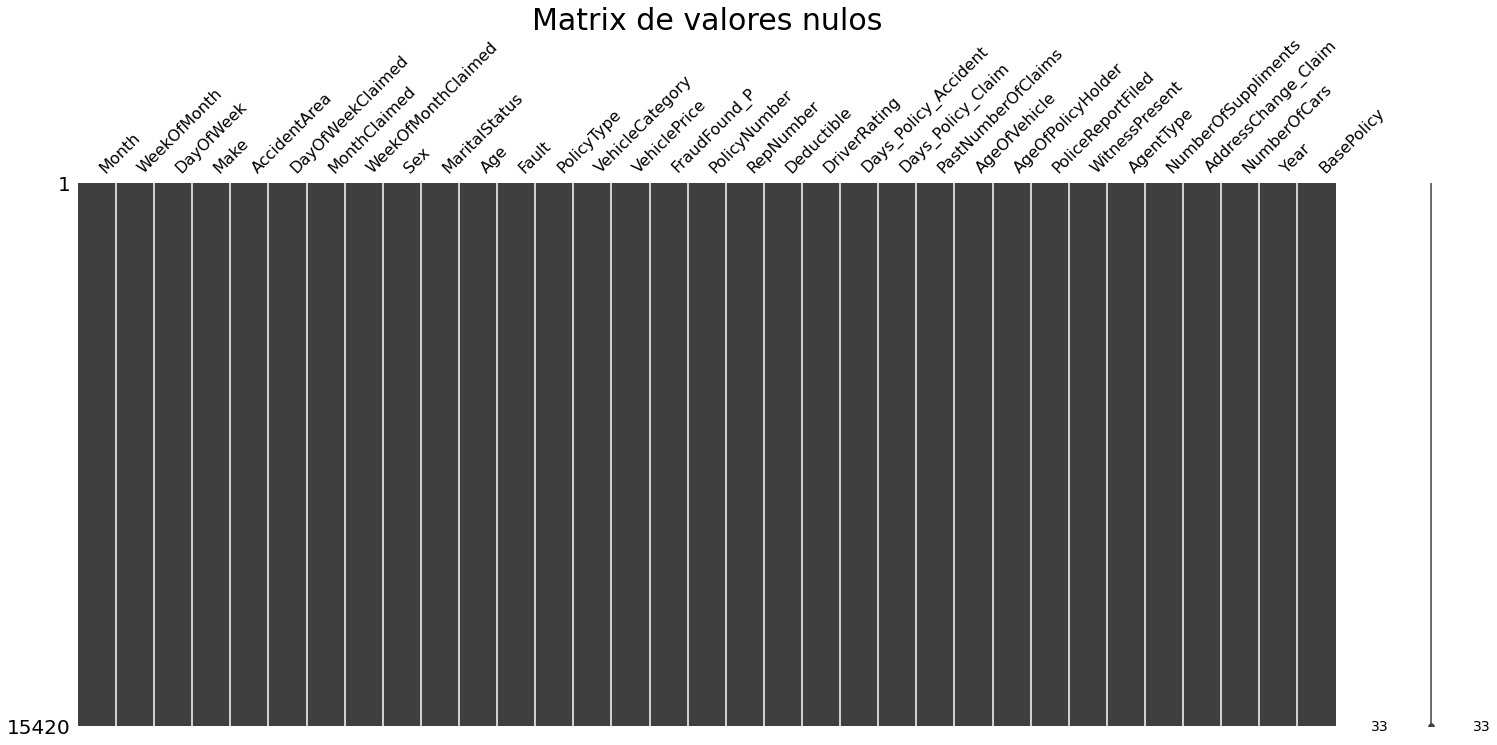

In [14]:
msno.matrix(df)
plt.title("Matrix de valores nulos",fontsize=30)

No contamos con ninguna fila que contenga datos nulos. 

In [15]:
#Creo subdataset para obtener solo la información de los reclamos fraudulentos filtrando por FraudFound_P=1

df_fraud = df.loc[(df['FraudFound_P'] == 1)]
df_fraud.head(5)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,...,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
53,Jul,4,Saturday,Honda,Urban,Wednesday,Aug,2,Male,Married,...,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
94,Nov,2,Thursday,Honda,Urban,Friday,Jan,3,Male,Single,...,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Collision
96,Nov,2,Friday,Toyota,Urban,Tuesday,Jan,1,Male,Married,...,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision


In [16]:
#De este subdataset df_fraud, remuevo variables redundantes para analizar variables específicas que posibiliten identificar un perfil con caracteristicas comunes de quienes cometen fraude.
df_fraud_cleaned = df_fraud.copy().drop(['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed', 'MonthClaimed', 'Age','PolicyType','VehiclePrice', 'WeekOfMonthClaimed','PolicyNumber', 'RepNumber','Deductible','DriverRating', 'Days_Policy_Accident','AccidentArea','Year','PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments'], axis=1)

Text(0.5, 1.0, 'Culpable segmentado por seguro contratado')

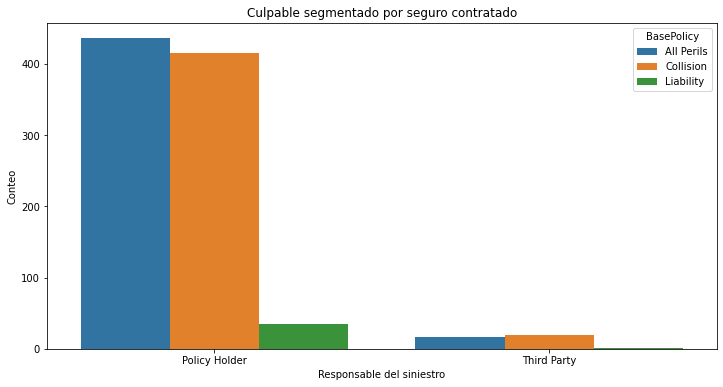

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Fault', hue='BasePolicy', data=df_fraud_cleaned)
plt.xlabel('Responsable del siniestro')
plt.ylabel('Conteo')
plt.title("Culpable segmentado por seguro contratado")

Este barplot muestra que se contrató una proporción alta y casi identica entre seguros con cobertura All perils (contra todo riesgo menos excepciones indicadas en la póliza) y Collision (cubren sólo daños al vehículo del propietario en caso de que accidente ocurra contra otro automóvil u objeto). 
La cantidad de cobertura Liability (responsabilidad civil contra terceros) fue contratada en menor proporción.

De este mismo gráfico se podría derivar que sólo el 2% de los 923 casos de fraude (20 casos aproximadamente) conspiraron con terceros para cobrar por daños o lesiones a terceros con la cobertura de liability y en el 98% de los casos restantes, pudieron haber causado el accidente contra un objeto y no otro vehiculo o causando lesiones a terceros dado que la cobertura de all perils y collision no cubriria dichos montos.

Text(0.5, 1.0, 'Estado marital segmentado por sexo')

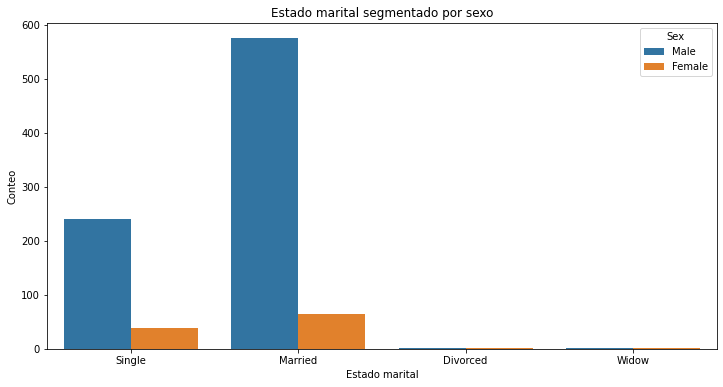

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MaritalStatus', hue='Sex', data=df_fraud_cleaned)
plt.xlabel('Estado marital')
plt.ylabel('Conteo')
plt.title("Estado marital segmentado por sexo")

Text(0.5, 1.0, 'Sexo segmentado por rango de edad del asegurado')

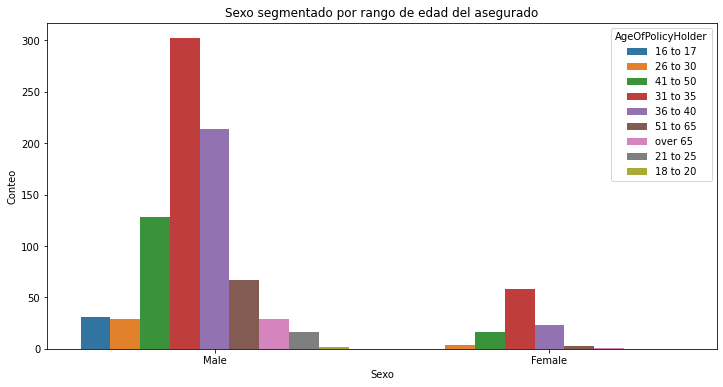

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', hue='AgeOfPolicyHolder', data=df_fraud_cleaned)
plt.xlabel('Sexo')
plt.ylabel('Conteo')
plt.title("Sexo segmentado por rango de edad del asegurado")

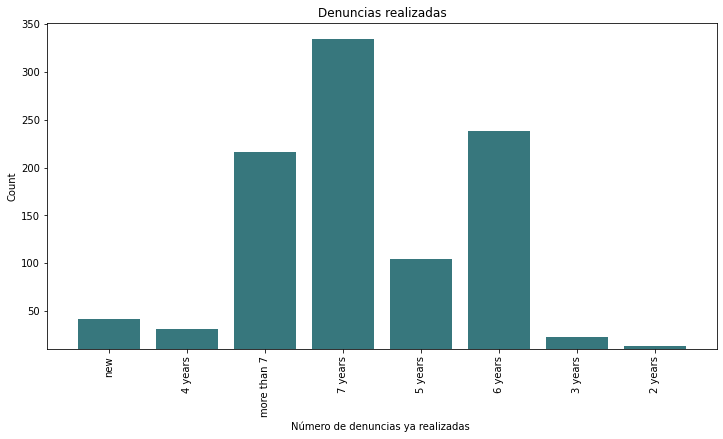

In [20]:
PastNumberOfClaims_count = df_fraud_cleaned['AgeOfVehicle']

freqs = Counter(PastNumberOfClaims_count)

xvals = range(len(freqs.values()))
plt.figure(figsize=(12, 6))
plt.bar(xvals, freqs.values() , color='#37777D', width=0.8, bottom= 10)
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.xlabel('Número de denuncias ya realizadas ')
plt.ylabel('Count')
plt.title("Denuncias realizadas")
plt.show() 

Podriamos reducir nuestro perfil a hombres entre 31-50 (ordenados por orden de prioridad: rangos 31-35 años, 36-40 y 41-50) años con estado marital casado y soltero con vehículo con mínimo de 5 años de vida.

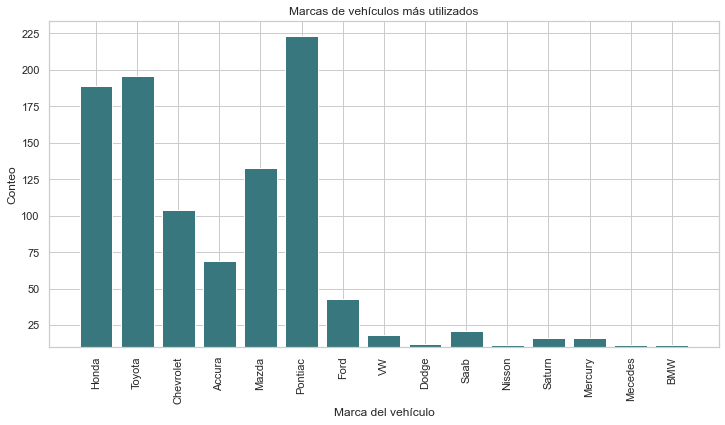

In [29]:
Make_count = df_fraud_cleaned['Make']

freqs = Counter(Make_count)

xvals = range(len(freqs.values()))
plt.figure(figsize=(12, 6))
plt.bar(xvals, freqs.values() , color='#37777D', width=0.8, bottom= 10)
plt.xticks(xvals, freqs.keys(), rotation='vertical')
plt.xlabel('Marca del vehículo')
plt.ylabel('Conteo')
plt.title("Marcas de vehículos más utilizados")
plt.show() 

En conclusión, una primera hipotesis para corroborar con aprendizaje no supervisado podría ser perfil: 

-Hombres 

-Entre 31-50 años

-Estado marital casado o soltero

-Vehículo con mínimo de 5 años de antiguedad

-Marca: Pontiac, Toyota, Honda, Mazda, Chevrolet

In [22]:
#Vuelvo al dataset original df. Remuevo colummas de variables que no considero relevantes.

df_fraud_mapped = df.copy().drop(['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed', 'MonthClaimed', 'Age','PolicyType','VehiclePrice', 'WeekOfMonthClaimed','PolicyNumber', 'RepNumber','Deductible','DriverRating', 'Days_Policy_Accident','AccidentArea','Year','PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments'], axis=1)
df_fraud_mapped.head()

,Make,Sex,MaritalStatus,Fault,VehicleCategory,FraudFound_P,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,AddressChange_Claim,NumberOfCars,BasePolicy
0,Honda,Female,Single,Policy Holder,Sport,0,more than 30,none,3 years,26 to 30,1 year,3 to 4,Liability
1,Honda,Male,Single,Policy Holder,Sport,0,more than 30,none,6 years,31 to 35,no change,1 vehicle,Collision
2,Honda,Male,Married,Policy Holder,Sport,0,more than 30,1,7 years,41 to 50,no change,1 vehicle,Collision
3,Toyota,Male,Married,Third Party,Sport,0,more than 30,1,more than 7,51 to 65,no change,1 vehicle,Liability
4,Honda,Female,Single,Third Party,Sport,0,more than 30,none,5 years,31 to 35,no change,1 vehicle,Collision


Paso de datos categóricos a numéricos

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Brand = le.fit_transform(df['Make'])

df_fraud_mapped.drop("Make", axis=1, inplace=True)
df_fraud_mapped["Make"] = Brand


In [24]:
df_fraud_mapped["Sex"]=df_fraud_mapped["Sex"].map({'Female':0, 'Male':1})
df_fraud_mapped["MaritalStatus"]=df_fraud_mapped["MaritalStatus"].map({'Single':0, 'Married':1, 'Widow':2, 'Divorced':3})
df_fraud_mapped["Fault"]=df_fraud_mapped["Fault"].map({'Policy Holder':0, 'Third Party':1})
df_fraud_mapped["VehicleCategory"]=df_fraud_mapped["VehicleCategory"].map({'Sport':0, 'Utility':1, 'Sedan':2})
df_fraud_mapped["PastNumberOfClaims"]=df_fraud_mapped["PastNumberOfClaims"].map({'none':0, '1':1, '2 to 4':2, 'more than 4':3})
df_fraud_mapped["AgeOfVehicle"]=df_fraud_mapped["AgeOfVehicle"].map({'3 years':2, '6 years':5, '7 years':6, 'more than 7':7, '5 years':4, 'new':0,'4 years':3, '2 years':1})
df_fraud_mapped["AgeOfPolicyHolder"]=df_fraud_mapped["AgeOfPolicyHolder"].map({'26 to 30':0, '31 to 35':1, '41 to 50':2, '51 to 65':3, '21 to 25':4,'36 to 40':5, '16 to 17':6, 'over 65':7, '18 to 20':8})
df_fraud_mapped["AddressChange_Claim"]=df_fraud_mapped["AddressChange_Claim"].map({'1 year':0, 'no change':1, '4 to 8 years':2, '2 to 3 years':3,'under 6 months':4})
df_fraud_mapped["NumberOfCars"]=df_fraud_mapped["NumberOfCars"].map({'3 to 4':0, '1 vehicle':1, '2 vehicles':2, '5 to 8':3, 'more than 8':4})
df_fraud_mapped["BasePolicy"]=df_fraud_mapped["BasePolicy"].map({'Liability':0, 'Collision':1, 'All Perils':2})
df_fraud_mapped["Days_Policy_Claim"]=df_fraud_mapped["Days_Policy_Claim"].map({'None':0, '8 to 15':1, '15 to 30':2,'more than 30':3})

In [25]:
df_fraud_mapped.head()

,Sex,MaritalStatus,Fault,VehicleCategory,FraudFound_P,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,AddressChange_Claim,NumberOfCars,BasePolicy,Make
0,0,0,0,0,0,3.0,0,2,0,0,0,0,6
1,1,0,0,0,0,3.0,0,5,1,1,1,1,6
2,1,1,0,0,0,3.0,1,6,2,1,1,1,6
3,1,1,1,0,0,3.0,1,7,3,1,1,0,17
4,0,0,1,0,0,3.0,0,4,1,1,1,1,6


<AxesSubplot:>

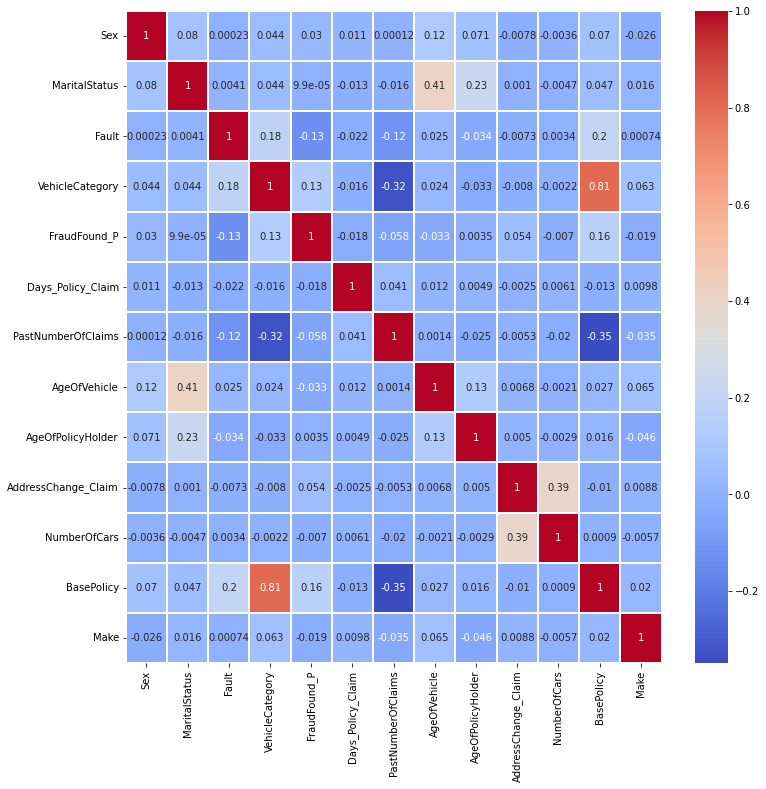

In [26]:
data_corr= df_fraud_mapped.corr()       
plt.figure(figsize=(12,12))
sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

Text(0.5, 1.0, 'Probabilidad de cambio de domicilio segmentado por fraude detectado')

<Figure size 864x432 with 0 Axes>

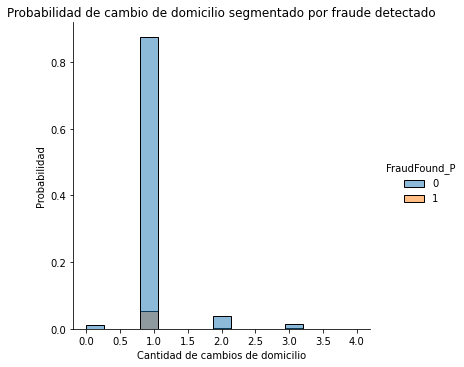

In [27]:
plt.figure(figsize=(12, 6))
sns.displot(x ='AddressChange_Claim', hue = "FraudFound_P",stat="probability",data = df_fraud_mapped)
plt.xlabel('Cantidad de cambios de domicilio')
plt.ylabel('Probabilidad')
plt.title('Probabilidad de cambio de domicilio segmentado por fraude detectado')

Text(0.5, 1.0, 'Relación entre sexo y categoría del vehiculo')

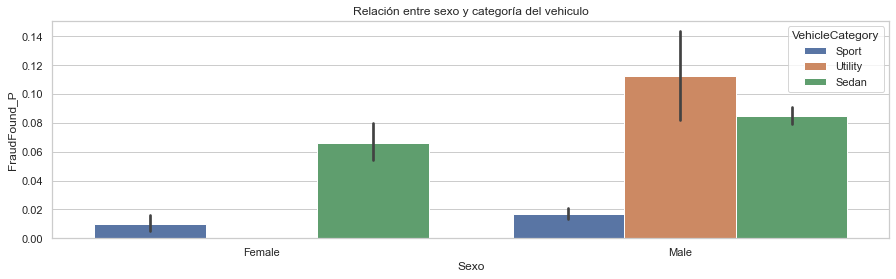

In [28]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFound_P', hue = 'VehicleCategory', data = df)
plt.xlabel('Sexo')
plt.title('Relación entre sexo y categoría del vehiculo')

En conclusión, el análisis exploratorio de datos revela que puede haber una relación entre ciertas características demográficas y la probabilidad de fraude. Específicamente los titulares de póliza de género masculino entre 31-35 años seguido de 35-40 años presentan tendencia a cometer fraudes de seguro. Este análisis también revela otros patrones y tendencias interesantes en el fraude de seguros. Por ejemplo, se encontró que ciertos tipos de pólizas son más propensos a ser objetivos (All perils y Collision) como también las marcas de vehículos más frecuentemente reportados en casos fraudulentos (Pontiac, Toyota, Honda, Mazda, Chevrolet) y la categoría del vehículo (Utility y Sedan).

El fraude es un problema significativo en la industria y estos conocimientos pueden utilizarse para desarrollar modelos de detección de fraude más sofisticados. Estos hallazgos subrayan la importancia de implementar medidas sólidas de detección de fraude y monitorear regularmente los datos de reclamaciones en busca de anomalías, permitiendo a las aseguradoras pueden tomar medidas proactivas para prevenir el fraude y proteger su rentabilidad.
